In [185]:
%%capture
'''
(C) Copyright 2020-2025 Murilo Marques Marinho (murilomarinho@ieee.org)

     This file is licensed in the terms of the
     Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)
     license.

 Derivative work of:
 https://github.com/dqrobotics/learning-dqrobotics-in-matlab/tree/master/robotic_manipulators
 Contributors to this file:
     Murilo Marques Marinho (murilomarinho@ieee.org)
'''

# DQ3 Dual Quaternion Basics using DQ Robotics

## I found an issue
Thank you! Please report it at https://github.com/MarinhoLab/OpenExecutableBooksRobotics/issues

## Introduction

Before introducing dual quaternions, it is common practice to introduce the concept of dual numbers. Let us start with that.

As always, let us make the essential installations and imports.


In [ ]:
%%capture
%pip install dqrobotics dqrobotics-pyplot
%pip install dqrobotics dqrobotics-pyplot --break-system-packages

In [187]:
from dqrobotics import *
from dqrobotics_extensions.pyplot import plot
import matplotlib.pyplot as plt
from math import pi, sin, cos 

<a name="H_8A18D41F"></a>
## Dual Numbers

The set of dual numbers $\mathbb{D}$ is yet a different way to extend $\mathbb{R}$ . Any dual number can be written in the form


$$\underline{ d } =a+b\varepsilon ,$$

where $a,b\in $ $\mathbb{R}$ . The algebra of dual numbers is based on the following property of the nilpotent dual unit


$$\varepsilon \not= 0,\varepsilon^2 =0\ldotp$$

For instance, the dual number


$${\underline{ d } }_1 =10-239\varepsilon$$

can be written using DQ Robotics as follows.


In [188]:
d1 = 10 - 239*E_
print(f"d1 = {d1}")

d1 =  - 10 + E*(239)



Note that the properties of the dual unit hold.


In [189]:
E_

E*(1)

In [190]:
E_ * E_

0

<a name="H_549D5E5F"></a>
### **Operations on dual numbers**

The operations on dual numbers are very similar to the operations on real numbers. We just need to respect the property $\varepsilon \not= 0,\varepsilon^2 =0\ldotp$


For instance, for the dual numbers


$${\underline{ d } }_1 =a_1 +{\varepsilon b}_1,$$
$${\underline{d} }_2 =a_2 +{\varepsilon b}_2.$$


In [191]:
d1 = 10 - 239*E_
print(f"d1 = {d1}")

d1 =  - 10 + E*(239)


In [192]:
d2 = 55 + 32*E_
print(f"d2 = {d2}")

d2 = 55 + E*(32)


<a name="H_3C5A7462"></a>
#### Sum/Subtraction

$${\underline{ d } }_1 \pm {\underline{ d } }_2 =\left(a_1 \pm a_2 \right)+\left(b_1 \pm b_2 \right)\varepsilon \ldotp$$

In [193]:
d1 + d2

45 + E*(271)

In [194]:
d1 - d2

 - 65 + E*(207)

<a name="H_C41E75F0"></a>
#### Product

In the dual number product, the nilpotent property of the dual unit shows.


$$\begin{array}{l} {\underline{ d } }_1 {\underline{ d } }_2 =\left(a_1 a_2 \right)+\varepsilon \left(a_1 b_2 +a_2 b_1 \right)+\varepsilon^2 \left(b_1 b_2 \right)\\ \Rightarrow {\underline{ d } }_1 {\underline{ d } }_2 =\left(a_1 a_2 \right)+\varepsilon \left(a_1 b_2 +a_2 b_1 \right) \end{array}$$

In [195]:
d1 * d2

 - 550 + E*(12825)

<a name="H_DDDA7B43"></a>
#### Primary part

The operator $P\left(\ldotp \right)$ can be used to obtain the primary part of the dual number. (The primary part is that which is not multiplied by the dual unit)


$$P\left(\underline{ d } \right)=a.$$

In [196]:
P(d1)

 - 10

<a name="H_A0E8C6FA"></a>
#### **Dual part**

The operator $D\left(\ldotp \right)$ can be used to obtain the dual part of the dual number. (The dual number is that which is multiplied by the dual unit)


$$D\left(\underline{ d } \right) = b.$$

In [197]:
D(d1)

239

<a name="H_885A6D6B"></a>
## **Dual quaternions**

When we extend the concept of dual numbers to be composed of two quaternions, we have what we call dual quaternions. They compose the set $\mathcal{H}$ and can always be written in the form


$$\underline{\mathit{\mathbf{h}}} =\mathit{\mathbf{h}}+\mathit{\mathbf{h}}^{\prime} \varepsilon,$$

where $\mathit{\mathbf{h}},\mathit{\mathbf{h}}^{\prime} \in $ $\mathbb{H}$ .


Note that $\mathbb{R}\subset \mathcal{H}$ , $\mathbb{C}\subset \mathcal{H}$ , $\mathbb{H}\subset \mathcal{H}$ , $\mathbb{D}\subset \mathcal{H}$ . That is, the real numbers, the complex numbers, the quaternions, and the dual numbers are all subsets of dual quaternions.


For instance, the dual quaternion


$${\underline{\mathit{\mathbf{h}}} }_1 =5+6\hat{\imath } +7\hat{\jmath } +8\hat{k} +\varepsilon \left(9+15\hat{\imath } +7\hat{\jmath } +8\hat{k} \right)$$

can be written using DQ Robotics as follows


In [198]:
h1 = 5 + 6*i_ + 7*j_ + 8*k_ + E_*(9 + 15*i_ + 7*j_ + 8*k_)
print(f"h1 = {h1}")

h1 = 5 + 6i + 7j + 8k + E*(9 + 15i + 7j + 8k)


<a name="H_F2FDC5E8"></a>
### Operations on dual quaternions

Considering ${\underline{\mathit{\mathbf{h}}} }_1 ,{\underline{\mathit{\mathbf{h}}} }_2 \in $ $\mathcal{H}$ , for example.


In [199]:
h1 = 5 + 6*i_ + 7*j_ + 8*k_ + E_*(9 + 15*i_ + 7*j_ + 8*k_)
print(f"h1 = {h1}")

h1 = 5 + 6i + 7j + 8k + E*(9 + 15i + 7j + 8k)


In [200]:
h2 = -25 + 1*k_ + E_*( 7*j_ + 8*k_)
print(f"h2 = {h2}")

h2 =  - 25 + 1k + E*(7j + 8k)


<a name="H_9FCFEB1E"></a>
#### Sum/Subtraction

$${\underline{\mathit{\mathbf{h}}} }_1 \pm {\underline{\mathit{\mathbf{h}}} }_2 =\left({\mathit{\mathbf{h}}}_1 \pm {\mathit{\mathbf{h}}}_2 \right)+\varepsilon \left({\mathit{\mathbf{h}}}_1^{\prime } \pm {\mathit{\mathbf{h}}}_2^{\prime } \right).$$

In [201]:
h1 + h2

 - 20 + 6i + 7j + 9k + E*(9 + 15i + 14j + 16k)

In [202]:
h1 - h2

30 + 6i + 7j + 7k + E*(9 + 15i)

<a name="H_19AB0712"></a>
#### **Multiplication**

$${\underline{\mathit{\mathbf{h}}} }_1 {\underline{\mathit{\mathbf{h}}} }_2 =\left({\mathit{\mathbf{h}}}_1 {\mathit{\mathbf{h}}}_2 \right)+\varepsilon \left({\mathit{\mathbf{h}}}_1 {\mathit{\mathbf{h}}}_2^{\prime } +{\mathit{\mathbf{h}}}_2 {\mathit{\mathbf{h}}}_1^{\prime } \right).$$

In [203]:
h1 * h2

 - 133 - 143i - 181j - 195k + E*( - 346 - 368i - 203j - 109k)


Notice that the multiplication between dual quaternions is, ***in general***, NOT COMMUTATIVE.


$${\mathit{\mathbf{h}}}_1 {\mathit{\mathbf{h}}}_2 \not= {{\mathit{\mathbf{h}}}_2 \mathit{\mathbf{h}}}_1.$$

In [204]:
h3 = h1 * h2
print(f"h3 = {h3}")

h3 =  - 133 - 143i - 181j - 195k + E*( - 346 - 368i - 203j - 109k)


In [205]:
h4 = h2 * h1
print(f"h4 = {h4}")

h4 =  - 133 - 157i - 169j - 195k + E*( - 346 - 382i - 77j - 193k)


In [206]:
if h3==h4:
    print('h1*h2 is equal to h2*h1')
else:
    print('h1*h2 is not equal to h2*h1')


h1*h2 is not equal to h2*h1


<a name="H_88C1E409"></a>
#### Conjugation

The conjugate of the dual quaternion is obtained by taking the conjugate of the primary part and the dual part of the dual quaternion. Both of which are quaternions. This same logic applies for many other operators.


$${\left({\underline{\mathit{\mathbf{h}}} }_1 \right)}^* ={\left({\mathit{\mathbf{h}}}_1 \right)}^* +{\varepsilon \left({\mathit{\mathbf{h}}}_1^{\prime } \right)}^*.$$

In [207]:
conj(h1)

5 - 6i - 7j - 8k + E*(9 - 15i - 7j - 8k)


**Norm**


$$\left|\right|{\underline{\mathit{\mathbf{h}}} }_1 \left|\right|=\sqrt{{\underline{\mathit{\mathbf{h}}} }_1 {\left({\underline{\mathit{\mathbf{h}}} }_1 \right)}^* }.$$

In [208]:
norm(h1)

13.190906 + E*(18.800831)

<a name="H_6202B6BC"></a>
#### Real part

$$\textrm{Re}\left({\underline{\mathit{\mathbf{h}}} }_1 \right)=\textrm{Re}\left({\mathit{\mathbf{h}}}_1 \right)+\epsilon \textrm{Re}\left({\mathit{\mathbf{h}}}_1^{\prime } \right).$$

In [209]:
Re(h1)

5 + E*(9)


If the real part of a dual quaternion is zero, it is called a *pure dual quaternion*, and belongs to the set ${\mathcal{H}}_p$ .

<a name="H_8897FE36"></a>
#### Imaginary part

$$\textrm{Im}\left({\underline{\mathit{\mathbf{h}}} }_1 \right)=\textrm{Im}\left({\mathit{\mathbf{h}}}_1 \right)+\epsilon \textrm{Im}\left({\mathit{\mathbf{h}}}_1^{\prime } \right).$$

In [210]:
Im(h1)

6i + 7j + 8k + E*(15i + 7j + 8k)


If the imaginary part of a dual quaternion is zero, it is a dual number.

<a name="H_55D1217E"></a>
#### Primary part

$$P\left({\underline{\mathit{\mathbf{h}}} }_1 \right)={\mathit{\mathbf{h}}}_1.$$

In [211]:
P(h1)

5 + 6i + 7j + 8k

<a name="H_C40A3A46"></a>
#### **Dual part**

$$D\left({\underline{\mathit{\mathbf{h}}} }_1 \right)={\mathit{\mathbf{h}}}_1^{\prime }.$$

In [212]:
D(h1)

9 + 15i + 7j + 8k

<a name="H_40C5166D"></a>
#### Vec6

The imaginary part of dual quaternions can be mapped to ${\mathbb{R}}^6$ as follows


$${\textrm{vec}}_6 \left({\underline{\mathit{\mathbf{h}}} }_1 \right)=\left\lbrack \begin{array}{c} {\textrm{vec}}_3 \left({\mathit{\mathbf{h}}}_1 \right)\\ {\textrm{vec}}_3 \left({\mathit{\mathbf{h}}}_1^{\prime } \right) \end{array}\right\rbrack.$$

In [213]:
vec6(h1)

array([ 6.,  7.,  8., 15.,  7.,  8.])

<a name="H_22949A8D"></a>
#### Vec8

Quaternions can be mapped to ${\mathbb{R}}^8$ as follows


$${\textrm{vec}}_4 \left({\underline{\mathit{\mathbf{h}}} }_1 \right)=\left\lbrack \begin{array}{c} {\textrm{vec}}_4 \left({\mathit{\mathbf{h}}}_1 \right)\\ {\textrm{vec}}_4 \left({\mathit{\mathbf{h}}}_1^{\prime } \right) \end{array}\right\rbrack$$

In [214]:
vec8(h1)

array([ 5.,  6.,  7.,  8.,  9., 15.,  7.,  8.])

<a name="H_1ADD63E3"></a>
#### Hamilton Operators

The hamilton operators are useful to provide a form of commutativity in the dual quaternion multiplication.


$${\textrm{vec}}_8 \left({\underline{\mathit{\mathbf{h}}} }_1 {\underline{\mathit{\mathbf{h}}} }_2 \right)=\overset{+}{{\mathit{\mathbf{H}}}_8 } \left({\underline{\mathit{\mathbf{h}}} }_1 \right){\textrm{vec}}_8 \left({\underline{\mathit{\mathbf{h}}} }_2 \right)=\overset{-}{{\mathit{\mathbf{H}}}_8 } \left({\underline{\mathit{\mathbf{h}}} }_2 \right){\textrm{vec}}_8 \left({\underline{\mathit{\mathbf{h}}} }_1 \right)$$

In [215]:
vec8(h1*h2)

array([-133., -143., -181., -195., -346., -368., -203., -109.])

In [216]:
hamiplus8(h1)*vec8(h2)

array([[-125.,   -0.,   -0.,   -8.,    0.,    0.,    0.,    0.],
       [-150.,    0.,   -0.,    7.,    0.,    0.,    0.,    0.],
       [-175.,    0.,    0.,   -6.,    0.,    0.,    0.,    0.],
       [-200.,   -0.,    0.,    5.,    0.,    0.,    0.,    0.],
       [-225.,   -0.,   -0.,   -8.,    0.,   -0.,  -49.,  -64.],
       [-375.,    0.,   -0.,    7.,    0.,    0.,  -56.,   56.],
       [-175.,    0.,    0.,  -15.,    0.,    0.,   35.,  -48.],
       [-200.,   -0.,    0.,    9.,    0.,   -0.,   42.,   40.]])

In [217]:
haminus8(h2)*vec8(h1)

array([[-125.,   -0.,   -0.,   -8.,    0.,    0.,    0.,    0.],
       [   0., -150.,    7.,   -0.,    0.,    0.,    0.,    0.],
       [   0.,   -6., -175.,    0.,    0.,    0.,    0.,    0.],
       [   5.,    0.,   -0., -200.,    0.,    0.,    0.,    0.],
       [   0.,   -0.,  -49.,  -64., -225.,   -0.,   -0.,   -8.],
       [   0.,    0.,   56.,  -56.,    0., -375.,    7.,   -0.],
       [  35.,  -48.,    0.,    0.,    0.,  -15., -175.,    0.],
       [  40.,   42.,   -0.,    0.,    9.,    0.,   -0., -200.]])

<a name="H_65EB895C"></a>
## Unit Dual Quaternions motion of rigid bodies

Unit dual quaternions compose the set $\underline{{\mathcal{S}}}$ , which represent pose transformations of the reference frame of rigid bodies in three dimensional space.


A unit dual quaternion representing a translation followed by a rotation can always be written in the form


$$\underline{\mathit{\mathbf{x}}} =\mathit{\mathbf{r}}+\varepsilon \frac{1}{2}\mathit{\mathbf{t}}\ldotp \mathit{\mathbf{r}}$$

where $\mathit{\mathbf{r}}\in$ ${\mathbb{S}}^3$ is the unit-norm quaternion representing the rotation; and $t$ $\in {\mathbb{H}}_p$ is the quaternion representing the translation.


Remember this nomenclature:

-  $t$ $\in {\mathbb{H}}_p$ is a translation.
-  $\mathit{\mathbf{r}}\in$ ${\mathbb{S}}^3$ is a rotation.
-  $\underline{\mathit{\mathbf{x}}}$ $\in$ $\underline{{\mathcal{S}}}$ is a pose transformation (combined translation and rotation).

Unit-norm dual-quaternions, as the name says, have unit norm


$$\left|\right|\underline{\mathit{\mathbf{x}}} \left|\right|=1\ldotp$$

For instance, to represent the translation of 1 meter about the y-axis,


$${\mathit{\mathbf{t}}}_1 =\hat{\jmath } ,$$

In [218]:
t1 = j_
print(f"t1 = {t1}")

t1 = 1j



followed by a rotation of $\frac{\pi }{2}$ rad about the x-axis,


$$r_1 =\cos \left(\frac{\pi }{4}\right)+\hat{\imath } \sin \left(\frac{\pi }{4}\right)$$

In [219]:
r1 = cos(pi/4) + i_*sin(pi/4)
print(f"r1 = {r1}")

r1 = 0.707107 + 0.707107i



the pose transformation will be


$${\underline{\mathit{\mathbf{x}}} }_1 ={\mathit{\mathbf{r}}}_1 +\varepsilon \frac{1}{2}{\mathit{\mathbf{t}}}_1 {\mathit{\mathbf{r}}}_1 =\cos \left(\frac{\pi }{4}\right)+\hat{\imath } \sin \left(\frac{\pi }{4}\right)+\frac{1}{2}\varepsilon \left(\hat{\jmath } \cos \left(\frac{\pi }{4}\right)-\hat{k} \sin \left(\frac{\pi }{4}\right)\right)$$

In [220]:
x1 = r1 + 0.5*E_*t1*r1
print(f"x1 = {x1}")

x1 = 0.707107 + 0.707107i + E*(0.353553j - 0.353553k)



We can check that ${\underline{\mathit{\mathbf{x}}} }_1$ indeed has unit norm


In [221]:
norm(x1)

1

#### Dual quaternion double-cover property

Given the way that the pose transformation is based on quaternions, the double cover also extends to dual quaternions.


$${\underline{\mathit{\mathbf{x}}} }_1$$

and


$$-{\underline{\mathit{\mathbf{x}}} }_1$$

represent the same pose transformation.

#### No pose transformation

The dual quaternion that represents that there is no pose transformation is


$${\underline{\mathit{\mathbf{x}}} }_1 =1$$

In [222]:
x1 = DQ([1])

#### Plotting unit dual quaternions

Using DQ Robotics, unit dual quaternions can be plotted on screen the same way as unit quaternions.


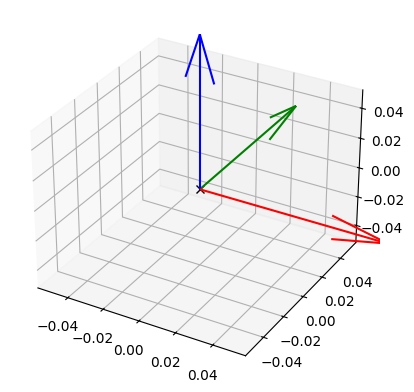

In [223]:
plt.figure()
ax = plt.axes(projection='3d')
plot(x1)
plt.show()

<a name="H_0984289C"></a>
#### Sequential pose transforrmations

Sequential pose transformations are obtained by post-multiplication of unit dual quaternions. For example, the transformation between the neutral reference frame by ${\underline{\mathit{\mathbf{x}}} }_1$ followed by ${\underline{\mathit{\mathbf{x}}} }_2$  is


$${\underline{\mathit{\mathbf{x}}} }_3 ={\underline{\mathit{\mathbf{x}}} }_1 {\underline{\mathit{\mathbf{x}}} }_2$$

In [224]:
print('Sequential pose transformations')

Sequential pose transformations


x3=0.995185 + 0.098017k + E*(0.049009 + 0.995185i - 0.098017j - 0.497592k)


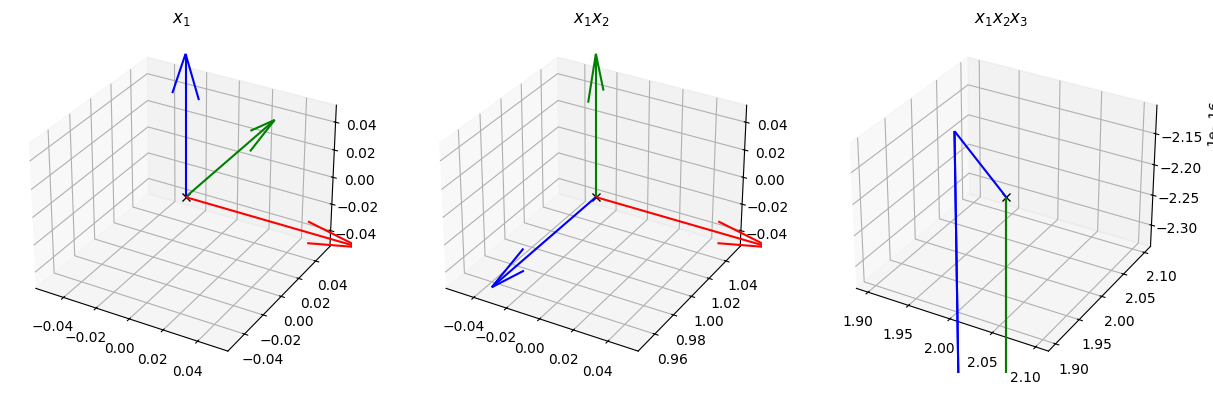

In [225]:
# Define the initial pose
t1 = 0
r1 = 1
x1 = r1 + 0.5*E_*t1*r1

# Define the second pose transformation
t2 = j_
r2 = cos(pi/4) + i_*sin(pi/4)
x2 = r2 + 0.5*E_*t2*r2

# Define the third pose transformation
t3 = -k_ + 2*i_
r3 = cos(pi/32) + k_*sin(pi/32)
x3 = r3 + 0.5*E_*t3*r3

# Plot using subplot
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,3,1, projection='3d')
plot(x1)
ax1.title.set_text('$x_1$')
ax2 = plt.subplot(1,3,2, projection='3d')
plot(x1 * x2)
ax2.title.set_text('$x_1 x_2$')
ax3 = plt.subplot(1,3,3, projection='3d')
plot(x1 * x2 * x3)
ax3.title.set_text('$x_1 x_2 x_3$')
plt.show()

<a name="H_0CCCC4CD"></a>
#### Reverse pose transformation

The reverse pose transformation can be obtained using the conjugate operation, because unit dual quaternions have unit norm. Hence,


$$\underline{\mathit{\mathbf{x}}} {\left(\underline{\mathit{\mathbf{x}}} \right)}^* =1$$

for any unit dual quaternion.


For example,


In [226]:
x3

0.995185 + 0.098017k + E*(0.049009 + 0.995185i - 0.098017j - 0.497592k)

In [227]:
x3 * conj(x3)

1

<a name="H_0117B51F"></a>
#### Rotation

The operator $\textrm{rotation}\left(\ldotp \right)$ can be used to retrieve the rotation represented by a unit dual quaternion.


In [228]:
rotation(x3)

0.995185 + 0.098017k

<a name="H_96709AB2"></a>
#### Translation

The operator $\textrm{translation}\left(\ldotp \right)$ can be used to retrive the translation represented by a unit dual quaternion.


In [229]:
translation(x3)

2i - 1k

# Homework

In [230]:
## Homework example
# Essential imports
from dqrobotics import *
from math import pi, sin, cos 

## Solutions
# Question 1

# Question 2

# Question 3



Following the template above to create a script called [dual_quaternion_basics_homework_part1.py], do the following.

1.  Store, in ${\underline{\mathit{\mathbf{x}}} }_1$ , the pose transformation of a translation of 1 meter in the x-axis, followed by a rotation of $\frac{\pi }{8}$ rad about the z-axis.
2. Store, in ${\underline{\mathit{\mathbf{x}}} }_2$ , the pose transformation of a translation of -1 meter in the z-axis, followed by a rotation of $-\frac{\pi }{2}$ rad about the x-axis.
3. Calculate the result of the sequential rotation of the neutral reference-frame by ${\underline{\mathit{\mathbf{x}}} }_0 =1$ , followed by ${\underline{\mathit{\mathbf{x}}} }_1$ , followed by ${\underline{\mathit{\mathbf{x}}} }_2$ , and store it in ${\underline{\mathit{\mathbf{x}}} }_3$ . Plot ${\underline{\mathit{\mathbf{x}}} }_3$ .
4. Obtain the rotation of ${\underline{\mathit{\mathbf{x}}} }_3$ without using $\textrm{rotation}\left(\ldotp \right)$
5. Obtain the translation of ${\underline{\mathit{\mathbf{x}}} }_3$ without using $\textrm{translation}\left(\ldotp \right)$
6. Obtain the pose transformation of a rotation of $\frac{\pi }{8}$ rad about the z-axis followed by a translation of 1 meter in the x-axis, and store it in ${\underline{\mathit{\mathbf{x}}} }_4$ . Is it the same as ${\underline{\mathit{\mathbf{x}}} }_1$ ? If it is different, why is it different?
